<a href="https://colab.research.google.com/github/tadanur/Data-Analysis-with-Python/blob/main/Team33_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Final Project - Group #33

## Milestone #3: Final Project
## Unicef Data Set: Impact of Covid-19 on Secondary and Primary School Education

**Harvard University**<br/>
**Fall 2021**<br/>
**Team Members**: Hugo Munoz-Sanchez, Kerem Atalay, and Tugba Adanur

<hr style="height:2pt">

In [ ]:
# styling adapted from CS109A assignments 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

In [ ]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV

<a id="intro"></a>

## Overview and data description

### Table of Contents

1. Overview and Data Description
2. Out-of-school Rate Data
3. Adjusted Net Attendance Rate Data
4. School Age Digital Connectivity Data
5. Preliminary Findings
6. Project Objective
7. Baseline Model

### Overview and Data Description

Note: the metrics in this section "Overview and Data Description" are sourced from https://data.unicef.org

More than 1 billion children are at risk of falling behind due to school closures aimed at containing the spread of COVID-19. To keep the world’s children learning, countries have been implementing remote education programmes. Yet many of the world’s children – particularly those in poorer households – do not have internet access, personal computers, TVs or even radio at home, amplifying the effects of existing learning inequalities. Students lacking access to the technologies needed for home-based learning have limited means to continue their education. As a result, many face the risk of never returning to school, undoing years of progress made in education around the world.

With school closures across 188 countries (as of April 2020), many of them are exploring alternative ways to provide continuous education using technologies such as Internet, TV, and radio. However, access to these technologies is limited in many low- and middle-income countries, especially among poor households.

* While more than 90 percent of the countries adopted digital and/or broadcast remote learning policies, only 60 per cent did so for pre-primary education.
* Policy measures taken by the governments to ensure learning continuity through broadcast or digital media allowed for potentially reaching 69 percent of schoolchildren (at maximum) in pre-primary to secondary education globally.
* 31 per cent of schoolchildren worldwide (463 million) cannot be reached by the broadcast- and Internet-based remote learning policies either due to the lack of necessary technological assets at home, or because they were not targeted by the adopted policies.
* Online platforms were the most used means by the governments to deliver education while schools remain closed, with 83 percent of countries using this method. However, this allowed for potentially reaching only about a quarter of schoolchildren worldwide.
* Television had the potential to reach the most students (62 percent) globally.
* Only 16 percent of schoolchildren could be reached by radio-based learning worldwide.
* Globally, 3 out of 4 students who cannot be reached by the remote learning policies come from rural areas and/or belong to the poorest households.

Considering these data, it is important that countries do not rely on any single remote learning channel to reach all children. Additionally, expanding access to Internet and other digital solutions for all children would be one key long-term priority to reduce learning vulnerabilities.

The data set provided here is a small subset of the Unicef Education data set. The following links contain further details about the data set, the predictors used, and the dataset description: https://data.unicef.org/resources/dataset/education-data/, https://data.unicef.org/topic/education/covid-19/

Please note the following steps were taken on the excel sheets from the unicef site before loading the data:

1. We consolidated data into one sheet per excel for manipulation. 
2. Steps include:
    1. We kept the three excel files separated
    2. We rearranged the top rows so that there is only one row with the identifier of the column. We had to rename some columns. Specifically
        1. In “adjusted Net Attendance Rate: 
            + One Year Before Primary: OYBP
            + Primary: P
            + Lower Secondary: LS
            + Upper Secondary: US
        2. In School Age Digital Connectivity: 
            + Total School Age: TSA
            + Pre-Primary: PP
            + Primary: P
            + Lower Secondary: LS
            + Upper Secondary: US
        3. Out of School Rate:
            + Primary: P
            + Lower Secondary: LS
            + Upper Secondary: US
    3. There is a summary table at the bottom of each sheet that we removed as well so that when we import into a DF, the new data is as clean as possible
    4. We deleted explanation sheets
    5. We combined all sheets in one sheet renaming the columns as described above
    6. We assumed the columns “ISO3, Countries and areas, Region, Sub-region and Development Regions” were common across all sheets of the excel file. Random sampling (stare and compare) did not challenge this assumption.

### Loading the data

### Out-of-school Rate Data

Data description: Out-of-school children rate – Percentage of children or young people in the official age range for a given level of education who are not attending either pre-primary, primary, secondary, or higher levels of education.

In [ ]:
df_out = pd.read_excel('data/Out-of-school-rate_2021-1.xlsx')

print(
    f"Our out-of-school rate data contains {len(df_out):,} samples. \n"
)

print("OUT-OF-SCHOOL RATE DATA INFORMATION:\n")
df_out.info()

print("\nOUT-OF-SCHOOL RATE DATA HEAD:")
display(df_out.head())

print("\nOUT-OF-SCHOOL RATE DATA SUMMARY STATISTICS:")
display(df_out.describe())

Our out-of-school rate data contains 218 samples. 

OUT-OF-SCHOOL RATE DATA INFORMATION:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISO3                 202 non-null    object 
 1   Countries and areas  216 non-null    object 
 2   Region               206 non-null    object 
 3   Sub-region           204 non-null    object 
 4   Development Regions  203 non-null    object 
 5   P-Total              125 non-null    float64
 6   P-Female             125 non-null    float64
 7   P-Male               125 non-null    float64
 8   P-Rural              109 non-null    float64
 9   P-Urban              109 non-null    float64
 10  P-Poorest            103 non-null    float64
 11  P-Second             103 non-null    float64
 12  P-Middle             103 non-null    float64
 13  P-Fourth             103 non-null    float64
 14  

,ISO3,Countries and areas,Region,Sub-region,Development Regions,P-Total,P-Female,P-Male,P-Rural,P-Urban,...,US-Male,US-Rural,US-Urban,US-Poorest,US-Second,US-Middle,US-Fourth,US-Richest,US-Data source,US-Time period
0,AFG,Afghanistan,SA,SA,Least Developed,37.000000,47.099998,27.799999,42.299999,19.299999,...,42.885773,62.708984,44.534233,69.791000,64.022758,63.875000,54.083176,39.933971,DHS 2015,2015.0
1,ALB,Albania,ECA,EECA,More Developed,2.400000,2.100000,2.600000,3.900000,1.100000,...,12.400000,16.000000,9.300000,26.600000,11.400000,10.500000,5.400000,4.700000,DHS 2017-18,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,2.000000,1.900000,2.100000,2.400000,1.800000,...,28.206545,32.561485,21.144169,40.241577,28.993839,24.439426,19.872517,11.878176,MICS 2012-13,2013.0
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,21.694818,22.132315,21.267633,34.787529,14.423168,...,21.075096,52.517494,19.263464,58.480488,50.302082,27.247580,16.990280,9.268948,DHS 2015-16,2016.0



OUT-OF-SCHOOL RATE DATA SUMMARY STATISTICS:


,P-Total,P-Female,P-Male,P-Rural,P-Urban,P-Poorest,P-Second,P-Middle,P-Fourth,P-Richest,...,US-Female,US-Male,US-Rural,US-Urban,US-Poorest,US-Second,US-Middle,US-Fourth,US-Richest,US-Time period
count,125.000000,125.000000,125.000000,109.000000,109.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,121.000000,121.000000,106.000000,106.000000,101.000000,101.000000,101.000000,101.000000,101.000000,108.000000
mean,9.134226,2716.261606,2298.368042,12.301056,5.847723,17.620204,12.948714,9.886942,7.203762,3.816877,...,256.633719,249.004529,36.505539,23.532243,46.951208,37.878018,32.349876,25.475298,16.876964,2015.527778
std,13.218333,13229.198318,11439.882406,16.342740,7.719091,20.613068,17.424995,14.948259,11.557526,6.102545,...,2511.583071,2454.021298,22.567768,15.064996,24.722124,24.456330,22.225942,20.057389,15.060414,2.577611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.600000,0.344744,0.000000,0.794083,0.000000,0.000000,0.000000,2010.000000
25%,1.100000,1.610920,1.700000,1.600000,1.200000,2.150000,1.811019,1.400000,1.196132,0.700000,...,8.226219,12.001182,18.550000,12.370265,28.670713,18.403793,14.900000,10.748212,5.600000,2014.000000
50%,3.196392,4.400000,4.700000,4.500000,2.900000,7.600000,4.300000,3.487911,2.800000,1.700000,...,22.879511,23.278376,33.538877,20.000000,44.340336,35.500000,27.247580,19.900000,11.878176,2016.000000
75%,8.400000,23.000000,20.382568,18.799999,6.800000,32.050001,20.900000,13.700000,6.550000,3.700000,...,44.910942,38.692711,54.333711,32.656000,68.263496,57.375896,44.536705,37.055996,24.161982,2018.000000
max,72.400002,133359.963000,112275.609000,77.500000,55.500000,86.199997,84.300003,77.000000,64.699997,44.099998,...,27654.521000,27019.358000,95.398056,69.846741,98.641083,97.030037,97.398743,91.567932,63.277740,2019.000000


### Adjusted Net Attendance Rate Data

Data description: Adjusted net attendance rate (ANAR) – Percentage of children of a given age that are attending an education level compatible with their age or attending a higher education level.

In [ ]:
df_attn = pd.read_excel('data/Adjusted-net-attendance-rate_2021-1.xlsx')

print(
    f"Our adjusted-net-attendance rate data contains {len(df_attn):,} samples. \n"
)

print("ATTENDANCE RATE DATA INFORMATION:\n")
df_attn.info()

print("\nATTENDANCE RATE DATA HEAD:")
display(df_attn.head())

print("\nATTENDANCE RATE DATA SUMMARY STATISTICS:")
display(df_attn.describe())



Our adjusted-net-attendance rate data contains 218 samples. 

ATTENDANCE RATE DATA INFORMATION:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 58 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISO3                 202 non-null    object 
 1   Countries and areas  216 non-null    object 
 2   Region               206 non-null    object 
 3   Sub-region           204 non-null    object 
 4   Development Regions  203 non-null    object 
 5   OYBP-Total           122 non-null    float64
 6   OYBP-Female          121 non-null    float64
 7   OYBP-Male            121 non-null    float64
 8   OYBP-Rural           106 non-null    float64
 9   OYBP-Urban           106 non-null    float64
 10  OYBP-Poorest         99 non-null     float64
 11  OYBP-Second          99 non-null     float64
 12  OYBP-Middle          99 non-null     float64
 13  OYBP-Fourth          99 non-null     float6

,ISO3,Countries and areas,Region,Sub-region,Development Regions,OYBP-Total,OYBP-Female,OYBP-Male,OYBP-Rural,OYBP-Urban,...,US-Male,US-Rural,US-Urban,US-Poorest,US-Second,US-Middle,US-Fourth,US-Richest,US-Data source,US-Time period
0,AFG,Afghanistan,SA,SA,Least Developed,34.136063,29.306059,38.497471,34.344322,33.470692,...,37.099998,23.600000,39.900002,17.0,21.0,21.799999,32.900002,44.599998,DHS 2015,2015.0
1,ALB,Albania,ECA,EECA,More Developed,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DZA,Algeria,MENA,MENA,Less Developed,69.811234,71.419441,68.296310,64.491142,73.211349,...,33.900002,32.799999,47.799999,23.4,33.0,41.900002,49.500000,65.000000,MICS 2012-13,2013.0
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,52.865299,50.535126,55.051647,36.095570,63.525547,...,32.099998,6.700000,39.000000,2.5,6.0,19.700001,37.900002,60.599998,DHS 2015-16,2016.0



ATTENDANCE RATE DATA SUMMARY STATISTICS:


,OYBP-Total,OYBP-Female,OYBP-Male,OYBP-Rural,OYBP-Urban,OYBP-Poorest,OYBP-Second,OYBP-Middle,OYBP-Fourth,OYBP-Richest,...,US-Female,US-Male,US-Rural,US-Urban,US-Poorest,US-Second,US-Middle,US-Fourth,US-Richest,US-Time period
count,122.000000,121.000000,121.000000,106.000000,106.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,102.000000,102.000000,100.000000,100.000000,98.000000,97.000000,97.000000,97.000000,97.000000,102.000000
mean,63.351179,2491.085884,2076.049393,66.820991,75.686645,57.252635,64.990201,70.310904,76.022440,83.093026,...,46.946189,43.212920,37.374718,52.298110,28.006399,35.040469,41.040755,48.789491,62.372588,2015.558824
std,31.689026,11524.961934,9847.506131,25.323372,23.937665,29.016599,27.546844,25.985528,23.135911,19.854393,...,28.816935,26.966449,29.592624,24.416469,28.895588,30.181175,30.126294,28.968588,25.293967,2.589291
min,0.000000,9.000000,0.000000,11.177333,0.000000,2.000000,5.000000,8.000000,6.000000,22.431446,...,2.800000,3.200000,0.100000,6.800000,0.000000,0.000000,0.000000,1.200000,8.800000,2010.000000
25%,43.473990,56.230953,55.051647,47.726775,66.233387,31.318591,43.332987,47.252666,63.692814,80.724735,...,23.393730,20.750000,11.800461,35.099999,3.925000,7.473210,15.500000,26.949774,44.599998,2014.000000
50%,69.406898,81.018341,78.985718,68.610695,83.433609,55.622017,68.282059,77.500000,83.099998,90.998894,...,40.950001,35.864761,27.209150,47.687952,14.100000,23.500000,35.700001,47.384365,66.199997,2016.000000
75%,90.929348,96.300003,95.595215,89.841953,94.099998,84.467720,90.407482,93.894421,94.456161,96.662930,...,72.518375,66.150002,60.925000,72.193459,46.281472,58.700001,66.500000,76.699997,85.300003,2018.000000
max,100.000000,113430.000000,93336.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,96.199997,95.199997,94.599998,96.699997,95.900002,95.300003,97.400002,97.228455,99.476158,2019.000000


### School Age Digital Connectivity Data

Data description: School-age digital connectivity data set – Percentage of children in a school attendance age (approximately 3-17 years old depending on the country) that have internet connection at home

In [ ]:
df_digital = pd.read_excel('data/School-Age-Digital-Connectivity.xlsx')

print(
    f"Our adjusted-net-attendance rate data contains {len(df_digital):,} samples. \n"
)

print("DIGITAL CONNECTIVITY DATA INFORMATION:\n")
df_digital.info()

print("\nDIGITAL CONNECTIVITY DATA HEAD:")
display(df_digital.head())

print("\nDIGITAL CONNECTIVITY DATA SUMMARY STATISTICS:")
display(df_digital.describe())

Our adjusted-net-attendance rate data contains 87 samples. 

DIGITAL CONNECTIVITY DATA INFORMATION:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISO3                 87 non-null     object 
 1   Countries and areas  87 non-null     object 
 2   Region               87 non-null     object 
 3   Sub-region           87 non-null     object 
 4   Income Group         87 non-null     object 
 5   TSA-Total            87 non-null     float64
 6   TSA-Rural            77 non-null     float64
 7   TSA-Urban            80 non-null     float64
 8   TSA-Poorest          70 non-null     float64
 9   TSA-Richest          69 non-null     float64
 10  TSA-Data source      87 non-null     object 
 11  TSA-Time period      87 non-null     object 
 12  PP-Total             87 non-null     float64
 13  PP-Rural             77 non-null     floa

,ISO3,Countries and areas,Region,Sub-region,Income Group,TSA-Total,TSA-Rural,TSA-Urban,TSA-Poorest,TSA-Richest,...,LS-Richest,LS-Data source,LS-Time period,US-Total,US-Rural,US-Urban,US-Poorest,US-Richest,US-Data source,US-Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),0.237807,0.091202,0.322005,0.005888,0.772502,...,0.782440,Multiple Indicator Cluster Survey,2018-19,0.240308,0.018753,0.326347,0.000000,0.686112,Demographic and Health Survey,2015-16
1,AGO,Angola,SSA,ESA,Lower middle income (LM),0.165507,0.017646,0.243431,0.000000,0.624589,...,0.618907,Demographic and Health Survey,2015-16,0.447193,NaN,NaN,NaN,NaN,Multiple Indicator Cluster Survey,2011-12
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.398849,NaN,NaN,NaN,NaN,...,NaN,Multiple Indicator Cluster Survey,2011-12,0.848591,0.778453,0.909979,0.540645,1.000000,Demographic and Health Survey,2015-16
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.809218,0.709329,0.883609,0.466020,0.991219,...,0.994673,Demographic and Health Survey,2015-16,0.419667,0.381093,0.567928,0.125420,0.787830,Multiple Indicator Cluster Survey,2019
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.366474,0.327793,0.516416,0.087617,0.758899,...,0.733826,Multiple Indicator Cluster Survey,2019,0.756602,0.759691,0.755032,0.038847,1.000000,Multiple Indicator Cluster Survey,2012



DIGITAL CONNECTIVITY DATA SUMMARY STATISTICS:


,TSA-Total,TSA-Rural,TSA-Urban,TSA-Poorest,TSA-Richest,PP-Total,PP-Rural,PP-Urban,PP-Poorest,PP-Richest,...,LS-Total,LS-Rural,LS-Urban,LS-Poorest,LS-Richest,US-Total,US-Rural,US-Urban,US-Poorest,US-Richest
count,87.000000,77.000000,80.000000,70.000000,69.000000,87.000000,77.000000,80.000000,70.000000,68.000000,...,87.000000,77.000000,80.000000,70.000000,68.000000,82.000000,71.000000,74.000000,69.000000,68.000000
mean,0.356033,0.270814,0.439327,0.184760,0.625947,0.335083,0.255691,0.417076,0.178554,0.608474,...,0.362188,0.272736,0.447296,0.188189,0.626891,0.403059,0.313343,0.481605,0.206024,0.642541
std,0.295594,0.284163,0.296324,0.258449,0.347874,0.291733,0.279023,0.295360,0.260253,0.350395,...,0.296253,0.286340,0.294962,0.258528,0.346842,0.314677,0.305012,0.310600,0.274499,0.346793
min,0.003246,0.000108,0.009728,0.000000,0.001522,0.003877,0.000000,0.009997,0.000000,0.001764,...,0.001686,0.000206,0.008386,0.000000,0.000618,0.005748,0.000000,0.013930,0.000000,0.004458
25%,0.076087,0.022305,0.166898,0.002511,0.323350,0.061307,0.019660,0.147570,0.001904,0.262875,...,0.081725,0.025236,0.183562,0.002525,0.341941,0.089883,0.029043,0.182974,0.003012,0.323029
50%,0.306607,0.131805,0.441570,0.040825,0.758899,0.268030,0.116364,0.397200,0.031637,0.723887,...,0.312350,0.127001,0.461212,0.040591,0.742561,0.379079,0.172000,0.508179,0.067599,0.761920
75%,0.605256,0.483903,0.695294,0.301554,0.939728,0.510080,0.394225,0.633949,0.240762,0.941886,...,0.631901,0.497000,0.679132,0.268827,0.936858,0.728698,0.564567,0.788633,0.388232,0.948347
max,0.993000,0.912665,0.965077,0.888000,1.000000,0.993000,0.909507,0.966828,0.891000,1.000000,...,0.993000,0.911079,0.962225,0.875000,1.000000,0.993000,0.919881,0.974822,0.901000,1.000000


In [ ]:
#Taking a deeper look into the "Time Period" variables

display(df_out[["P-Time period","LS-Time period","US-Time period"]].describe())

display(df_attn[["OYBP-Time period","P-Time period","LS-Time period","US-Time period"]].describe()) 

display(df_digital[["TSA-Time period","PP-Time period","P-Time period","LS-Time period","US-Time period"]].describe())
# Sinde the time period variables in the df_digital are objects, we need to visually inspect them
for col in ["TSA-Time period","PP-Time period","P-Time period","LS-Time period","US-Time period"]:
    print(f"\nUnique values of variable {col}:")
    print(df_digital[col].unique())

,P-Time period,LS-Time period,US-Time period
count,112.000000,110.000000,108.000000
mean,2015.455357,2015.509091,2015.527778
std,2.581599,2.565635,2.577611
min,2010.000000,2010.000000,2010.000000
25%,2013.750000,2014.000000,2014.000000
50%,2016.000000,2016.000000,2016.000000
75%,2018.000000,2018.000000,2018.000000
max,2019.000000,2019.000000,2019.000000


,OYBP-Time period,P-Time period,LS-Time period,US-Time period
count,109.000000,116.000000,105.000000,102.000000
mean,2015.302752,2015.258621,2015.485714,2015.558824
std,2.767217,2.651073,2.635243,2.589291
min,2010.000000,2010.000000,2010.000000,2010.000000
25%,2013.000000,2013.000000,2014.000000,2014.000000
50%,2016.000000,2016.000000,2016.000000,2016.000000
75%,2018.000000,2018.000000,2018.000000,2018.000000
max,2019.000000,2019.000000,2019.000000,2019.000000


,TSA-Time period,PP-Time period,P-Time period,LS-Time period,US-Time period
count,87,87,87,87,82
unique,20,20,20,20,20
top,2018,2018,2018,2018,2018
freq,16,16,17,16,15



Unique values of variable TSA-Time period:
['2018-19' '2015-16' '2011-12' '2019' '2012' '2017-18' '2016' '2018'
 '2013' '2010' '2014' '2017' '2015' '2014-15' '2016-17' '2076' '2018-2019'
 '2562' '2011' '2012-99']

Unique values of variable PP-Time period:
['2018-19' '2015-16' '2011-12' '2019' '2012' '2017-18' '2016' '2018'
 '2013' '2010' '2014' '2017' '2015' '2014-15' '2016-17' '2076' '2018-2019'
 '2562' '2011' '2012-99']

Unique values of variable P-Time period:
['2015-16' '2011-12' '2019' '2012' '2017-18' '2016' '2018' '2013' '2010'
 '2014' '2018-19' '2017' '2015' '2014-15' '2016-17' '2076' '2018-2019'
 '2562' '2011' '2012-99']

Unique values of variable LS-Time period:
['2018-19' '2015-16' '2011-12' '2019' '2012' '2017-18' '2016' '2018'
 '2013' '2010' '2014' '2017' '2015' '2014-15' '2016-17' '2076' '2018-2019'
 '2562' '2011' '2012-99']

Unique values of variable US-Time period:
['2015-16' '2011-12' '2019' '2012' '2017-18' '2018' '2013' '2010' '2014'
 '2018-19' '2017' '2016' '2014-1

### Preliminary Findings

After our initial EDA we found the following:
1. Data is not available beyond 2019. This is a major issue since our initial goal was to measure "Impact of Covid-19 on Secondary And Primary school education"
2. There is a signiffican amount of missing data. As an example, in df_attn we have 218 rows of data and 47 out of the 57 predictors have less than 122 datapoints. In df_out, we have 218 rows of data and 36 out of the 47 predictors have less than 125 datapoints.
3. The data is clustered in the 2014-2019 timeframe preventing meaningful time series analysis

Given the above findings, we have taken the following decisions:
1. We will change the objective of the dataset from trying to predict COVID impact to trying to predict out of school rates
2. Given the socio-economic differences across countries, we do not feel comfortable trying to predict missing values. There is too much variablity not acounted for across countries.


### Project Objective

Our recommendation is to change our essential question from "Impact of Covid-19 on Secondary And Primary school education" to "Impact of attendance rates and digital connectivity on out-of-school rates". Specifically, our response variable will be Upper Secondary Out of School rate. 

### Prediction Models

Our target model is: Upper Secondary Out of School rate as a function of variables in the net-attendance and digital connectivity datasets. We will do additional data preparation and exploration ahead of running the models.



In [ ]:
# First we will combine all datasets into one monolithic DF per country
# NOTE: running this cell multiple times will add strings to the names of the predictors! RUN THIS CELL ONLY ONCE!

# Checking the sizes of the DFs
print(f"Dimensions of the df_out dataframe: {df_out.shape}")
print(f"Dimensions of the df_attn dataframe: {df_attn.shape}")
print(f"Dimensions of the df_digital dataframe: {df_digital.shape}")

# We noticed that we had variables with the same name in two different dataframes
# This created issues when merging dataframes
# We renamed most columns of the DF and merged on the common keys
df_out.columns = df_out.columns.str.replace('-', '-OUT-')
df_attn.columns = df_attn.columns.str.replace('-', '-ATTN-')
df_digital.columns = df_digital.columns.str.replace('-', '-DIGITAL-')

#This merges on our country key and keeps the values not present in both df
merged_1=pd.merge(df_attn,df_digital, on=['ISO3','Countries and areas','Region'],how = 'outer') 

# Keeping track of the changes to ensure the merge went as expected
print(f"Dimensions of the combined dataframe with df_attn and df_digital: {merged_1.shape}")
display(merged_1.head())

# Make the final merge
merged_final=pd.merge(merged_1,df_out, on=['ISO3','Countries and areas','Region'],how = 'outer')
print(f"Dimensions of the combined dataframe with all three dataframes: {merged_final.shape}")
# The shape is consistent with the number of predictors 47+58+40=145 minus the 6 predictors we keyed off of when we did the merges =139
# We noticed that there are two new countries "added" from 218 to 220

Dimensions of the df_out dataframe: (218, 47)
Dimensions of the df_attn dataframe: (218, 58)
Dimensions of the df_digital dataframe: (87, 40)
Dimensions of the combined dataframe with df_attn and df_digital: (218, 95)


,ISO3,Countries and areas,Region,Sub-ATTN-region,Development Regions,OYBP-ATTN-Total,OYBP-ATTN-Female,OYBP-ATTN-Male,OYBP-ATTN-Rural,OYBP-ATTN-Urban,...,LS-DIGITAL-Richest,LS-DIGITAL-Data source,LS-DIGITAL-Time period,US-DIGITAL-Total,US-DIGITAL-Rural,US-DIGITAL-Urban,US-DIGITAL-Poorest,US-DIGITAL-Richest,US-DIGITAL-Data source,US-DIGITAL-Time period
0,AFG,Afghanistan,SA,SA,Least Developed,34.136063,29.306059,38.497471,34.344322,33.470692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,Albania,ECA,EECA,More Developed,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DZA,Algeria,MENA,MENA,Less Developed,69.811234,71.419441,68.296310,64.491142,73.211349,...,0.782440,Multiple Indicator Cluster Survey,2018-19,0.240308,0.018753,0.326347,0.0,0.686112,Demographic and Health Survey,2015-16
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,52.865299,50.535126,55.051647,36.095570,63.525547,...,0.618907,Demographic and Health Survey,2015-16,0.447193,NaN,NaN,NaN,NaN,Multiple Indicator Cluster Survey,2011-12


Dimensions of the combined dataframe with all three dataframes: (220, 139)


In [ ]:
print(
    f"Our combined dataframe contains {len(merged_final):,} samples. \n"
)

print("Combined dataframe INFORMATION:\n")
merged_final.info()

print("\nCombined dataframe DATA HEAD:")
display(merged_final.head())

print("\nCombined dataframe SUMMARY STATISTICS:")
display(merged_final.describe())

Our combined dataframe contains 220 samples. 

Combined dataframe INFORMATION:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 219
Columns: 139 entries, ISO3 to US-OUT-Time period
dtypes: float64(112), object(27)
memory usage: 240.6+ KB

Combined dataframe DATA HEAD:


,ISO3,Countries and areas,Region,Sub-ATTN-region,Development Regions_x,OYBP-ATTN-Total,OYBP-ATTN-Female,OYBP-ATTN-Male,OYBP-ATTN-Rural,OYBP-ATTN-Urban,...,US-OUT-Male,US-OUT-Rural,US-OUT-Urban,US-OUT-Poorest,US-OUT-Second,US-OUT-Middle,US-OUT-Fourth,US-OUT-Richest,US-OUT-Data source,US-OUT-Time period
0,AFG,Afghanistan,SA,SA,Least Developed,34.136063,29.306059,38.497471,34.344322,33.470692,...,42.885773,62.708984,44.534233,69.791000,64.022758,63.875000,54.083176,39.933971,DHS 2015,2015.0
1,ALB,Albania,ECA,EECA,More Developed,NaN,NaN,NaN,NaN,NaN,...,12.400000,16.000000,9.300000,26.600000,11.400000,10.500000,5.400000,4.700000,DHS 2017-18,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,69.811234,71.419441,68.296310,64.491142,73.211349,...,28.206545,32.561485,21.144169,40.241577,28.993839,24.439426,19.872517,11.878176,MICS 2012-13,2013.0
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,52.865299,50.535126,55.051647,36.095570,63.525547,...,21.075096,52.517494,19.263464,58.480488,50.302082,27.247580,16.990280,9.268948,DHS 2015-16,2016.0



Combined dataframe SUMMARY STATISTICS:


,OYBP-ATTN-Total,OYBP-ATTN-Female,OYBP-ATTN-Male,OYBP-ATTN-Rural,OYBP-ATTN-Urban,OYBP-ATTN-Poorest,OYBP-ATTN-Second,OYBP-ATTN-Middle,OYBP-ATTN-Fourth,OYBP-ATTN-Richest,...,US-OUT-Female,US-OUT-Male,US-OUT-Rural,US-OUT-Urban,US-OUT-Poorest,US-OUT-Second,US-OUT-Middle,US-OUT-Fourth,US-OUT-Richest,US-OUT-Time period
count,122.000000,121.000000,121.000000,106.000000,106.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,121.000000,121.000000,106.000000,106.000000,101.000000,101.000000,101.000000,101.000000,101.000000,108.000000
mean,63.351179,2491.085884,2076.049393,66.820991,75.686645,57.252635,64.990201,70.310904,76.022440,83.093026,...,256.633719,249.004529,36.505539,23.532243,46.951208,37.878018,32.349876,25.475298,16.876964,2015.527778
std,31.689026,11524.961934,9847.506131,25.323372,23.937665,29.016599,27.546844,25.985528,23.135911,19.854393,...,2511.583071,2454.021298,22.567768,15.064996,24.722124,24.456330,22.225942,20.057389,15.060414,2.577611
min,0.000000,9.000000,0.000000,11.177333,0.000000,2.000000,5.000000,8.000000,6.000000,22.431446,...,0.000000,0.000000,0.600000,0.344744,0.000000,0.794083,0.000000,0.000000,0.000000,2010.000000
25%,43.473990,56.230953,55.051647,47.726775,66.233387,31.318591,43.332987,47.252666,63.692814,80.724735,...,8.226219,12.001182,18.550000,12.370265,28.670713,18.403793,14.900000,10.748212,5.600000,2014.000000
50%,69.406898,81.018341,78.985718,68.610695,83.433609,55.622017,68.282059,77.500000,83.099998,90.998894,...,22.879511,23.278376,33.538877,20.000000,44.340336,35.500000,27.247580,19.900000,11.878176,2016.000000
75%,90.929348,96.300003,95.595215,89.841953,94.099998,84.467720,90.407482,93.894421,94.456161,96.662930,...,44.910942,38.692711,54.333711,32.656000,68.263496,57.375896,44.536705,37.055996,24.161982,2018.000000
max,100.000000,113430.000000,93336.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,27654.521000,27019.358000,95.398056,69.846741,98.641083,97.030037,97.398743,91.567932,63.277740,2019.000000


In [ ]:
#display(merged_final.shape)
merged_final_nona=merged_final.dropna()
#display(merged_final_nona.shape)

print(f"The number of observations has been reduced from {merged_final.shape[0]} to {merged_final_nona.shape[0]} when we remove the NAs")

The number of observations has been reduced from 220 to 44 when we remove the NAs


In [ ]:
merged_final_nona['US-OUT-Total'].describe()

count    44.000000
mean     30.545634
std      19.120187
min       1.084513
25%      16.085686
50%      26.562248
75%      39.581849
max      75.199997
Name: US-OUT-Total, dtype: float64

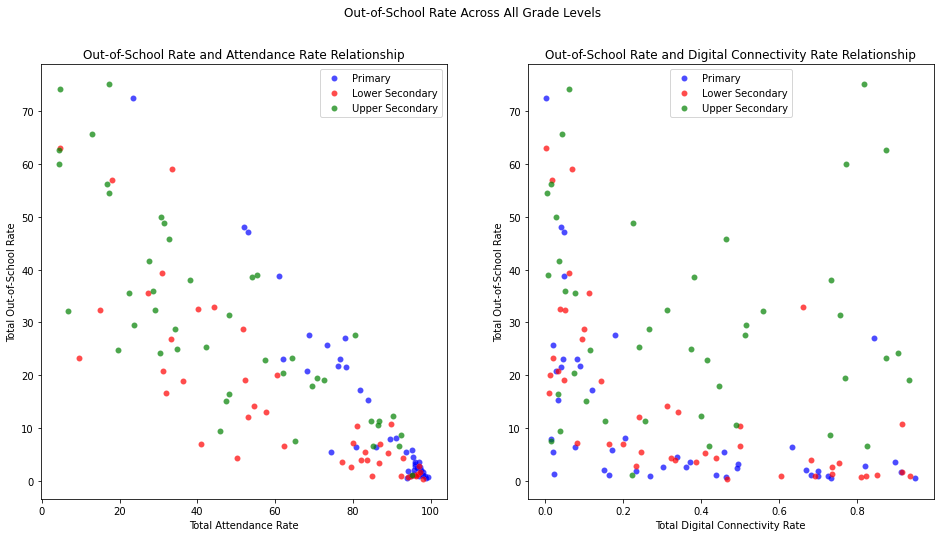

In [ ]:
# initial observation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Out-of-School Rate Across All Grade Levels')

# plot the relationship between the out-of-school rate and attendance rate
ax1.set_title("Out-of-School Rate and Attendance Rate Relationship")
ax1.set_xlabel("Total Attendance Rate")
ax1.set_ylabel("Total Out-of-School Rate")
ax1.scatter(x = merged_final_nona['P-ATTN-Total'], y = merged_final_nona['P-OUT-Total'], color = "blue", edgecolors = "white", 
                                                            linewidths = 0.1, alpha = 0.7, label="Primary")
ax1.scatter(x = merged_final_nona['LS-ATTN-Total'], y = merged_final_nona['LS-OUT-Total'], color = "red", edgecolors = "white", 
                                                            linewidths = 0.1, alpha = 0.7, label="Lower Secondary")
ax1.scatter(x = merged_final_nona['US-ATTN-Total'], y = merged_final_nona['US-OUT-Total'], color = "green", edgecolors = "white", 
                                                            linewidths = 0.1, alpha = 0.7, label="Upper Secondary")
ax1.legend()


# plot the relationship between the out-of-school rate and digital connectivity rate
ax2.set_title("Out-of-School Rate and Digital Connectivity Rate Relationship")
ax2.set_xlabel("Total Digital Connectivity Rate")
ax2.set_ylabel("Total Out-of-School Rate")
ax2.scatter(x = merged_final_nona['P-DIGITAL-Total'], y = merged_final_nona['P-OUT-Total'], color = "blue", edgecolors = "white", 
                                                            linewidths = 0.1, alpha = 0.7, label="Primary")
ax2.scatter(x = merged_final_nona['LS-DIGITAL-Total'], y = merged_final_nona['LS-OUT-Total'], color = "red", edgecolors = "white", 
                                                            linewidths = 0.1, alpha = 0.7, label="Lower Secondary")
ax2.scatter(x = merged_final_nona['US-DIGITAL-Total'], y = merged_final_nona['US-OUT-Total'], color = "green", edgecolors = "white", 
                                                            linewidths = 0.1, alpha = 0.7, label="Upper Secondary")
ax2.legend()

We suspect there may be multicolinearity so we will calculate the VIF across all predictors in the dataset. The diagonal elements are the VIF:

In [ ]:
X=merged_final_nona[['OYBP-ATTN-Total','P-ATTN-Total', 'LS-ATTN-Total', 'US-ATTN-Total',  'TSA-DIGITAL-Total', 'PP-DIGITAL-Total',
                      'P-DIGITAL-Total', 'LS-DIGITAL-Total','US-DIGITAL-Total']]

df_cor = merged_final_nona.corr()
# The diagonal elements are the VIF:
pd.DataFrame(np.linalg.inv(merged_final_nona.corr().values), index = df_cor.index, columns=df_cor.columns)


,OYBP-ATTN-Total,OYBP-ATTN-Female,OYBP-ATTN-Male,OYBP-ATTN-Rural,OYBP-ATTN-Urban,OYBP-ATTN-Poorest,OYBP-ATTN-Second,OYBP-ATTN-Middle,OYBP-ATTN-Fourth,OYBP-ATTN-Richest,...,US-OUT-Female,US-OUT-Male,US-OUT-Rural,US-OUT-Urban,US-OUT-Poorest,US-OUT-Second,US-OUT-Middle,US-OUT-Fourth,US-OUT-Richest,US-OUT-Time period
OYBP-ATTN-Total,1.098342e+16,-7.962488e+15,5.058746e+16,-4.086261e+16,-2.759584e+16,-4.828235e+14,1.237667e+16,7.146290e+14,-6.626692e+15,8.642116e+15,...,-2.047796e+16,4.783301e+13,-2.613859e+15,-2.551763e+15,5.026734e+15,-5.547213e+15,2.730945e+16,-3.501399e+16,1.990273e+16,-1.122781e+16
OYBP-ATTN-Female,-1.758007e+15,-1.210925e+15,2.254253e+15,1.337769e+13,1.895105e+14,-1.511153e+14,3.866418e+14,5.304528e+14,-3.338800e+14,9.664282e+13,...,4.012021e+13,-3.015497e+14,5.025932e+14,-6.733006e+12,8.230877e+14,-4.351992e+14,1.092580e+14,-6.908364e+14,1.465494e+14,2.387327e+14
OYBP-ATTN-Male,7.786471e+15,-7.994841e+15,4.854152e+16,-3.668284e+16,-2.439021e+16,-1.000963e+15,1.165031e+16,4.114938e+14,-6.171356e+15,7.575184e+15,...,-1.857744e+16,-2.515861e+14,-2.226601e+15,-2.117000e+15,5.347281e+15,-4.974173e+15,2.516954e+16,-3.306429e+16,1.855349e+16,-1.023528e+16
OYBP-ATTN-Rural,-1.152701e+16,1.072260e+16,-6.578376e+16,4.996776e+16,3.350311e+16,1.475122e+15,-1.520295e+16,-1.031796e+15,8.753472e+15,-1.049925e+16,...,2.561633e+16,4.775571e+14,2.811663e+15,3.180058e+15,-7.299140e+15,6.697192e+15,-3.426368e+16,4.456869e+16,-2.547099e+16,1.370928e+16
OYBP-ATTN-Urban,-3.024747e+15,3.375541e+15,-2.060690e+16,1.550176e+16,1.034268e+16,3.837356e+14,-4.773353e+15,-5.505653e+14,2.742307e+15,-3.312692e+15,...,7.944106e+15,1.726112e+14,8.379322e+14,1.050934e+15,-2.477703e+15,2.033127e+15,-1.058788e+16,1.384068e+16,-7.952859e+15,4.090208e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US-OUT-Second,-2.954810e+15,2.002329e+15,-1.207591e+16,9.620406e+15,6.474068e+15,2.566378e+14,-2.951227e+15,5.969560e+13,1.600071e+15,-1.935737e+15,...,4.858301e+15,-2.913160e+13,6.999674e+14,4.808937e+14,-1.109758e+15,1.223574e+15,-6.455543e+15,8.406891e+15,-4.755415e+15,2.787154e+15
US-OUT-Middle,2.830663e+15,-2.453582e+15,1.374429e+16,-1.021449e+16,-6.952778e+15,-4.910445e+14,3.174598e+15,-1.076801e+14,-1.750827e+15,2.092693e+15,...,-5.181999e+15,-9.573257e+13,-5.729588e+14,-5.332323e+14,1.418213e+15,-1.609643e+15,7.096136e+15,-9.259765e+15,5.092669e+15,-3.190877e+15
US-OUT-Fourth,-1.910028e+15,2.265925e+15,-1.304702e+16,9.637643e+15,6.495907e+15,3.213773e+14,-3.139149e+15,-2.000688e+14,1.764346e+15,-2.102302e+15,...,5.025233e+15,1.218907e+14,4.651746e+14,6.355460e+14,-1.355570e+15,1.488559e+15,-6.628130e+15,8.703302e+15,-4.947517e+15,2.957529e+15
US-OUT-Richest,3.258919e+15,-3.117866e+15,1.863809e+16,-1.395553e+16,-9.434484e+15,-4.777957e+14,4.312787e+15,1.658438e+14,-2.460370e+15,2.938332e+15,...,-7.088000e+15,-1.039544e+14,-7.294217e+14,-8.731315e+14,1.992000e+15,-2.035094e+15,9.516583e+15,-1.247895e+16,7.018370e+15,-3.923080e+15


We observe very large VIFs as expected since some variables are the breakdown of others into male and female. We will explore VIFs for a smaller dataset:

In [ ]:
df_cor = X.corr()
# The diagonal elements are the VIF:
pd.DataFrame(np.linalg.inv(X.corr().values), index = df_cor.index, columns=df_cor.columns)

,OYBP-ATTN-Total,P-ATTN-Total,LS-ATTN-Total,US-ATTN-Total,TSA-DIGITAL-Total,PP-DIGITAL-Total,P-DIGITAL-Total,LS-DIGITAL-Total,US-DIGITAL-Total
OYBP-ATTN-Total,2.246442,-1.427815,-1.009580,1.755491,-0.405894,-3.979160,-0.125667,3.839417,0.224991
P-ATTN-Total,-1.427815,5.215789,-4.846461,0.669144,-7.500565,6.578270,-0.096143,1.724362,0.159511
LS-ATTN-Total,-1.009580,-4.846461,14.796197,-8.714746,-3.185279,7.957089,0.469039,-6.695035,-0.175564
US-ATTN-Total,1.755491,0.669144,-8.714746,8.693436,-8.818472,-3.658168,-0.342702,11.919749,-0.275419
TSA-DIGITAL-Total,-0.405894,-7.500565,-3.185279,-8.818472,2030.235914,-832.170942,-17.843672,-1173.222708,-6.495729
PP-DIGITAL-Total,-3.979160,6.578270,7.957089,-3.658168,-832.170942,440.638780,8.339714,381.005548,2.151779
P-DIGITAL-Total,-0.125667,-0.096143,0.469039,-0.342702,-17.843672,8.339714,3.102012,7.034598,-0.260944
LS-DIGITAL-Total,3.839417,1.724362,-6.695035,11.919749,-1173.222708,381.005548,7.034598,782.455682,4.738449
US-DIGITAL-Total,0.224991,0.159511,-0.175564,-0.275419,-6.495729,2.151779,-0.260944,4.738449,1.177292


There is still some suspected multicolinearity (large VIFs) and large correlations. We will watch for this when selecting our predictors.

### Model 1: Multilinear Regression Model

Our target model is: Upper Secondary Out of School rate as a function of variables in the net-attendance and digital connectivity datasets. Our baseline model is a multilinear regression model that predicts Upper Secondary Out of School rate as a function of total Attendance and total Connectivity per school grade.

In [ ]:
# This command provides the list of variables so we can pick the right ones
# list(merged_final_nona.columns.values)

X=merged_final_nona[['OYBP-ATTN-Total','P-ATTN-Total', 'LS-ATTN-Total', 'US-ATTN-Total',  'TSA-DIGITAL-Total', 'PP-DIGITAL-Total',
                      'P-DIGITAL-Total', 'LS-DIGITAL-Total','US-DIGITAL-Total']]

y=merged_final_nona['US-OUT-Total']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

lreg = LinearRegression().fit(X_train,y_train)

y_pred_train= lreg.predict(X_train)
y_pred_test= lreg.predict(X_test)

# Printing the coefficients

predictors = ['OYBP-ATTN-Total','P-ATTN-Total', 'LS-ATTN-Total', 'US-ATTN-Total',  'TSA-DIGITAL-Total', 'PP-DIGITAL-Total',
                      'P-DIGITAL-Total', 'LS-DIGITAL-Total','US-DIGITAL-Total']

pred_coef = zip(predictors, lreg.coef_)
pred_coef_zip = dict(pred_coef)

print("The prediction coefficients are:  " )
for item in pred_coef_zip:
    print(item,' : ' , round(pred_coef_zip[item],2))

# Compute the MSE 
MSE_train = mean_squared_error(y_train,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

print("               ")
print(f"Train MSE for this linear regression model is: {MSE_train}")
print(f"Test MSE for this linear regression model is: {MSE_test}")

r2_train = lreg.score(X_train, y_train)
r2_test = lreg.score(X_test, y_test)
print("               ")
print(f'R2 training set: {r2_train:.3f}')
print(f'R2 testing set: {r2_test:.3f}')

The prediction coefficients are:  
OYBP-ATTN-Total  :  -0.03
P-ATTN-Total  :  -0.46
LS-ATTN-Total  :  0.21
US-ATTN-Total  :  -0.53
TSA-DIGITAL-Total  :  -114.0
PP-DIGITAL-Total  :  73.87
P-DIGITAL-Total  :  9.83
LS-DIGITAL-Total  :  29.4
US-DIGITAL-Total  :  0.41
               
Train MSE for this linear regression model is: 94.66503215716078
Test MSE for this linear regression model is: 132.3219988555158
               
R2 training set: 0.756
R2 testing set: 0.417


### Model 2: PCA (Principal Component Analysis)

We explored Principal Component Analysis (PCA) as our second alternative.

/Users/tadanur/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '190'),
 Text(0, 0, '180'),
 Text(0, 0, '209'),
 Text(0, 0, '220'),
 Text(0, 0, '228'),
 Text(0, 0, '201'),
 Text(0, 0, '229'),
 Text(0, 0, '321'),
 Text(0, 0, '404'),
 Text(0, 0, '575'),
 Text(0, 0, '747'),
 Text(0, 0, '381'),
 Text(0, 0, '351')]

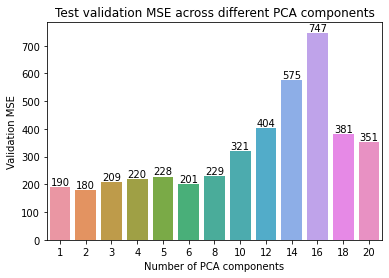

In [ ]:
# In this step we will be using PCA to explain the variability in the data
# Below we are getting all the numeric variables in the dataset

float_list = []
for i in merged_final_nona.columns:
    if merged_final_nona[i].dtypes != 'object':
        float_list.append(i)
        
# Excluding the variables associated with the response variable 
X_for_PCA = float_list[:90]  # removing variables named "OUT", since we use "OUT" as response variable


# Splitting the data by train and test
X=merged_final_nona[X_for_PCA]

y=merged_final_nona['US-OUT-Total']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)


# Standardization approach taken from lab 6 PCA
# We also used some PCA code from HW4

X_train_scaled = StandardScaler().fit_transform(X_train)
X_train_df_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)


k=[1,2,3,4,5,6,8,10,12,14,16,18,20]
cross_validation_error,cross_validation_error_rounded=[],[]

for comp in k:
    #Perform PCA
    pca = PCA(n_components=comp).fit(X_train_df_scaled)
    X_pca = pca.transform(X_train_df_scaled)
    
    lreg=LinearRegression()
    lreg.fit(X_pca,y_train)
    mse_score = cross_validate(lreg,X_pca,y_train,scoring='neg_mean_squared_error',cv=4,return_train_score=True)

    cross_validation_error.append(round(mse_score['test_score'].mean()*(-1),0))
       
ax=sns.barplot(k,cross_validation_error)
ax.set_title("Test validation MSE across different PCA components")
ax.set_ylabel('Validation MSE')
ax.set_xlabel('Number of PCA components')
ax.bar_label(ax.containers[0]) #Show the data labels to each bar

In [ ]:
# Fit the PCA transformation with n_components equals the best  𝑘  on the standardized X_train.
# k with the lowest validation error
min_mse = min(cross_validation_error)
best_k = k[cross_validation_error.index(min_mse)]

# Standardization approach taken from lab 6 PCA
X_train_scaled = StandardScaler().fit_transform(X_train)
X_train_df_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = StandardScaler().fit_transform(X_test)
X_test_df_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Apply the PCA transformation to the standardized X_train and the standardized X_test.
# Fitting the selected PCA
best_pca = PCA(n_components=best_k).fit(X_train_df_scaled)
# X train 
best_X_pca_train = best_pca.transform(X_train_df_scaled)
# X test
best_X_pca_test = best_pca.transform(X_test_df_scaled)

#Fit a linear regression model to the PCA-transformed components and report the test  𝑅2
# fitting a linear regression
lreg=LinearRegression()
lreg.fit(best_X_pca_train,y_train)
# getting test data predictions
y_pred_test = lreg.predict(best_X_pca_test)

# R2 scores
r2_test = r2_score(y_test, y_pred_test)

print(f"The R squared for a PCA model with {best_k} degrees is {r2_test}") 
print(f"The MSE for a PCA model with {best_k} degrees is {min_mse}")

The R squared for a PCA model with 2 degrees is 0.49028885114448617
The MSE for a PCA model with 2 degrees is 180.0


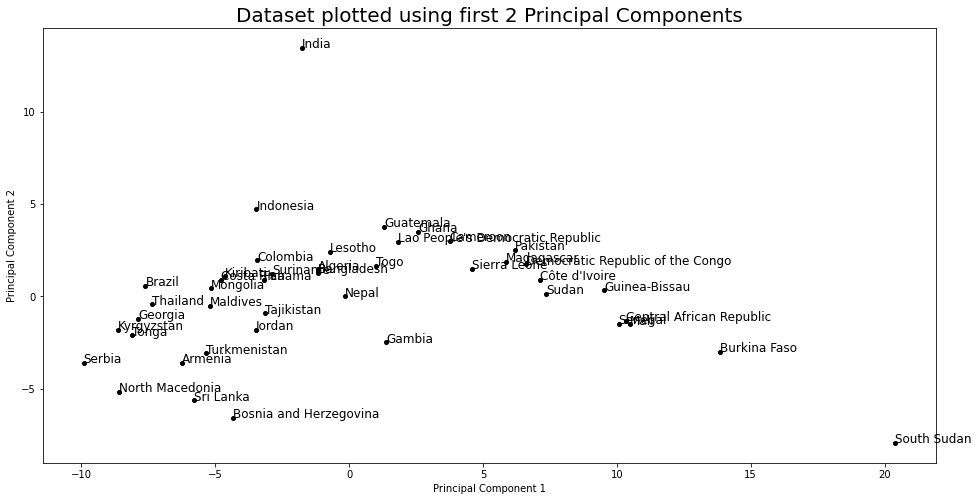

In [ ]:
# Applying PCA with 2 components to visualize the data

country, X = merged_final_nona['Countries and areas'], merged_final_nona[X_for_PCA].values

# Standardize X
X_std = StandardScaler().fit_transform(X)
X_df_std = pd.DataFrame(X_std)

#apply PCA transformation with n_components = 2
pca_2_comp = PCA(n_components=2).fit(X_df_std)
X_pca_2_comp = pca_2_comp.transform(X_df_std)

# Note: taken from Lab 6: PCA

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(X_pca_2_comp[:,0], X_pca_2_comp[:,1], 'ok', markersize=4)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Dataset plotted using first 2 Principal Components', fontsize=20)

# annotating text
for i, txt in enumerate(country):
    ax.annotate(txt, (X_pca_2_comp[:,0][i], X_pca_2_comp[:,1][i]), size=12)

### Model 3: Lasso

In [ ]:
# We clean-up the data in this cell

float_list = []
for i in merged_final_nona.columns:
    if merged_final_nona[i].dtypes != 'object': # Remove objects
        float_list.append(i)

# Excluding the variables associated with the response variable 
totals_list = []
X_for_pred = float_list[:90]

for i in X_for_pred:
    if 'Total' in i: # Removing variables that have "total" in the name
        X_for_pred.remove(i)
        totals_list.append(i)
    if 'Time period' in i: # Removing variables with "time period" in the name
        X_for_pred.remove(i)

del X_for_pred [63:72] # removing variables named "OUT", since we use "OUT" as response variable

In [ ]:
# We will explore Lasso

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


# Splitting the data by train and test
X=merged_final_nona[X_for_pred]

y=merged_final_nona['US-OUT-Total']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)


alphas = (0.001, 0.01, 0.1, 10, 100, 200, 500, 1000)


# Let us do k-fold cross validation 
k = 4
fitted_lasso = LassoCV(alphas=alphas, cv = k).fit(X_train, y_train)

lasso_a = fitted_lasso.alpha_

lasso_score = fitted_lasso.score(X_test, y_test)

print('Best alpha for lasso: {}'.format(lasso_a))

print('R^2 score for Lasso with alpha={}: {}'.format(lasso_a, lasso_score))

print('MSE score for Lasso:', mean_squared_error(y_test, fitted_lasso.predict(X_test)))

pred_coef = zip(X_for_pred, fitted_lasso.coef_)
pred_coef_zip = dict(pred_coef)

X_nonzero, X_nonzero_coef = [], []

print("The non-zero prediction coefficients are:  " )
for item in pred_coef_zip:
    if pred_coef_zip[item] != 0 :
        X_nonzero.append(item)
        X_nonzero_coef.append(pred_coef_zip[item])
        print(item,' : ' , round(pred_coef_zip[item],3))

Best alpha for lasso: 100.0
R^2 score for Lasso with alpha=100.0: 0.39907957062467125
MSE score for Lasso: 136.32822256740786
The non-zero prediction coefficients are:  
Urban population  :  -0.004
P-ATTN-Poorest  :  -0.027
LS-ATTN-Second  :  -0.242
US-ATTN-Middle  :  -0.159
Pop, rural  :  0.002


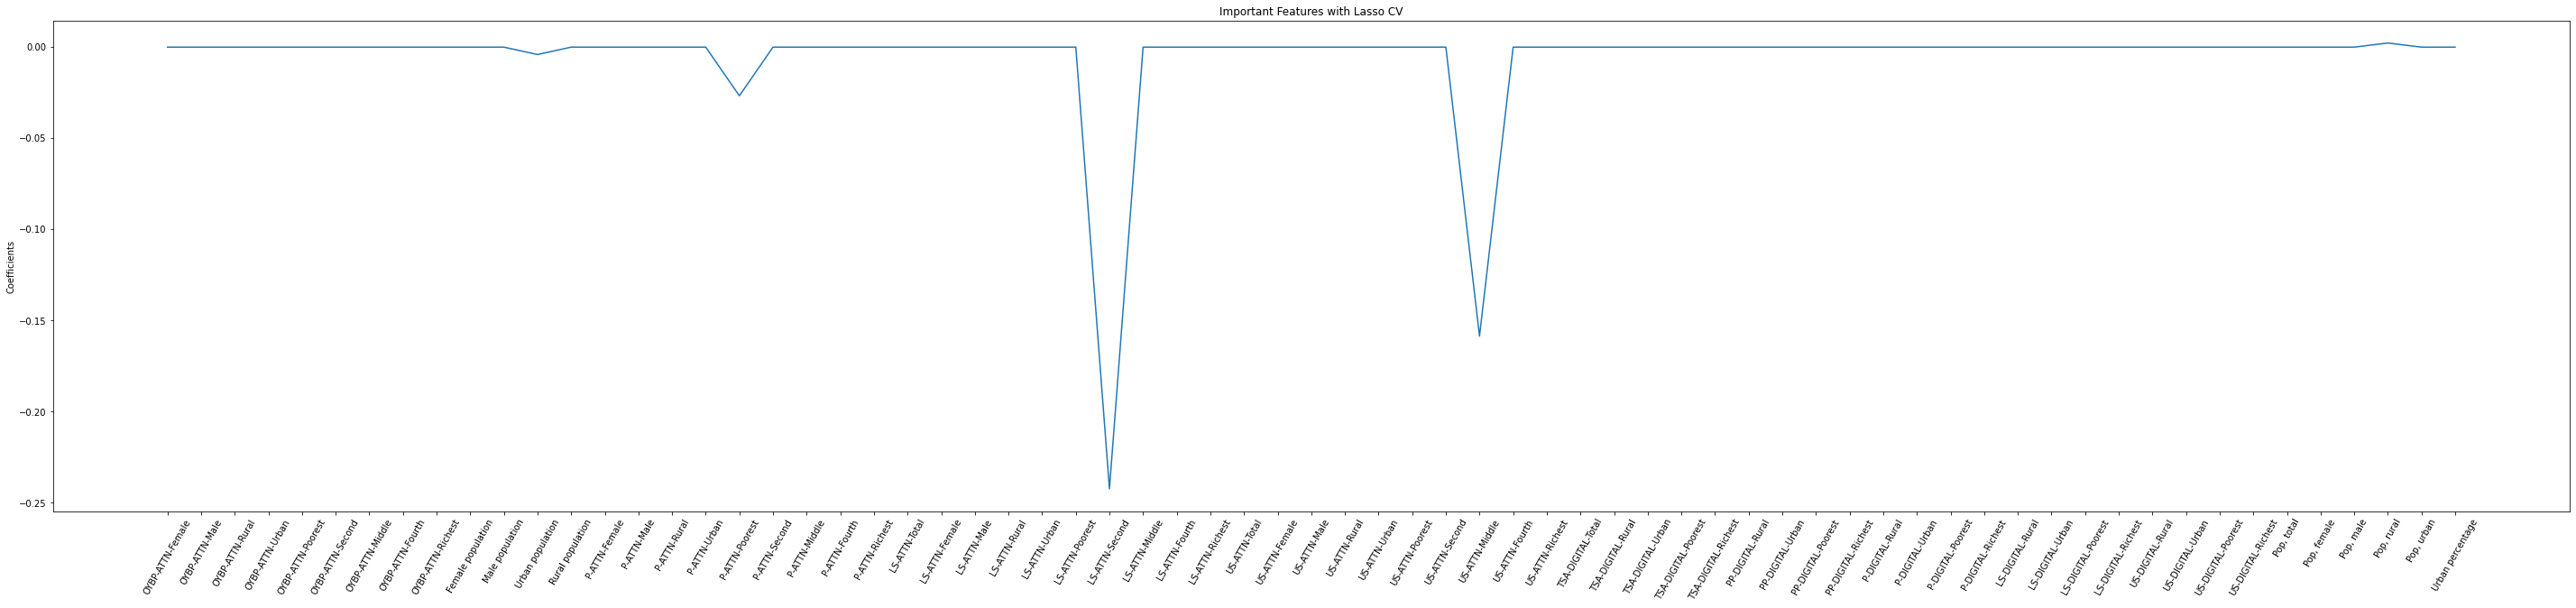

In [ ]:
# visualize the important predictors
_=plt.figure(figsize=(50, 10))
_=plt.title("Important Features with Lasso CV")
_=plt.plot(range(len(X_for_pred)), fitted_lasso.coef_)
_=plt.xticks(range(len(X_for_pred)), X_for_pred, rotation=60)
_=plt.ylabel("Coefficients")
_=plt.show()

# Please double click on the figure to take a closer look

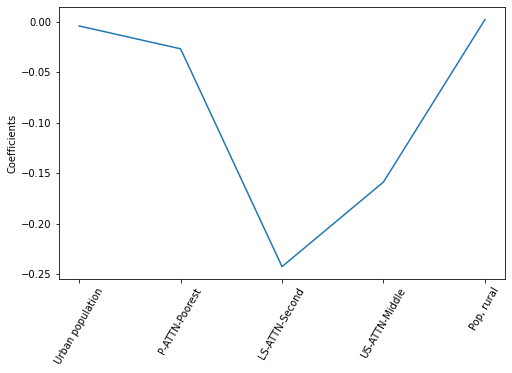

In [ ]:
# closer look at nonzero predictors
_=plt.figure(figsize=(8, 5))
_=plt.plot(range(len(X_nonzero)), X_nonzero_coef)
_=plt.xticks(range(len(X_nonzero)), X_nonzero, rotation=60)
_=plt.ylabel("Coefficients")
_=plt.show()

Text(0, 0.5, 'Total Out-of-School Frequency')

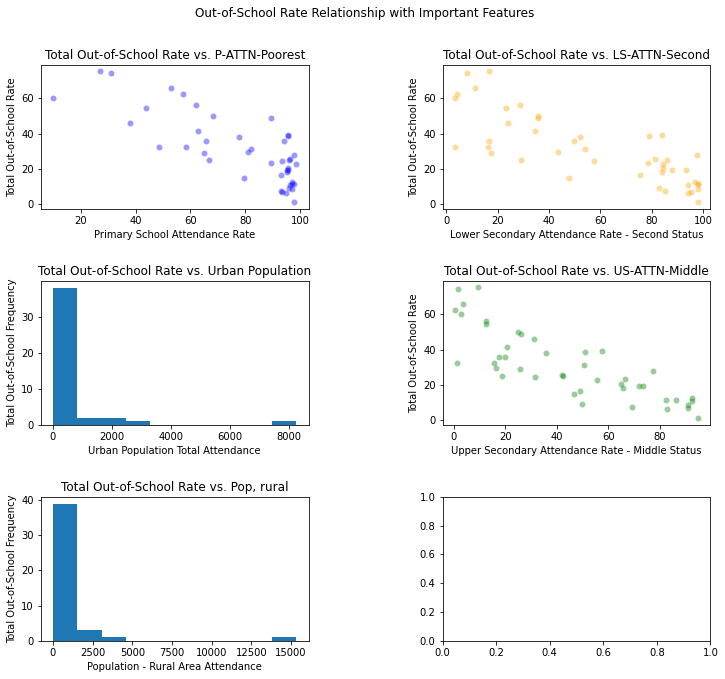

In [ ]:
# plot the relationship between the out-of-school rate and important features
fig, ax = plt.subplots(3, 2, figsize=(12, 10))
plt.subplots_adjust(left  = 0.125,
                    right = 0.9,    
                    bottom = 0.1,   
                    top = 0.9,      
                    wspace = 0.5,   
                    hspace = 0.5)

fig.suptitle('Out-of-School Rate Relationship with Important Features')

ax[0][0].set_title("Total Out-of-School Rate vs. P-ATTN-Poorest")
ax[0][0].scatter(x = merged_final_nona['P-ATTN-Poorest'], y = merged_final_nona['US-OUT-Total'], color = "blue", edgecolors = "white", 
                                                            linewidths = 0.1, alpha = 0.4, label="Primary Attendance Rate - Poorest")
ax[0][0].set_xlabel("Primary School Attendance Rate")
ax[0][0].set_ylabel("Total Out-of-School Rate")

ax[0][1].set_title("Total Out-of-School Rate vs. LS-ATTN-Second")
ax[0][1].scatter(x = merged_final_nona['LS-ATTN-Second'], y = merged_final_nona['US-OUT-Total'], color = "orange", edgecolors = "white", 
                                                            linewidths = 0.1, alpha = 0.4, label="Lower Secondary Attendance Rate")
ax[0][1].set_xlabel("Lower Secondary Attendance Rate - Second Status")
ax[0][1].set_ylabel("Total Out-of-School Rate")

ax[1][0].set_title("Total Out-of-School Rate vs. Urban Population")
ax[1][0].hist(merged_final_nona['Urban population'])
ax[1][0].set_xlabel("Urban Population Total Attendance")
ax[1][0].set_ylabel("Total Out-of-School Frequency")


ax[1][1].set_title("Total Out-of-School Rate vs. US-ATTN-Middle")
ax[1][1].scatter(x = merged_final_nona['US-ATTN-Middle'], y = merged_final_nona['US-OUT-Total'], color = "green", edgecolors = "white", 
                                                            linewidths = 0.1, alpha = 0.4, label="US Attendance - Middle Status")
ax[1][1].set_xlabel("Upper Secondary Attendance Rate - Middle Status")
ax[1][1].set_ylabel("Total Out-of-School Rate")

ax[2][0].set_title("Total Out-of-School Rate vs. Pop, rural")                                                           
ax[2][0].hist(merged_final_nona['Pop, rural'])
ax[2][0].set_xlabel("Population - Rural Area Attendance")
ax[2][0].set_ylabel("Total Out-of-School Frequency")


**The important predictors that affect the Upper Secondary Out-of-School rate are identified as primary school attendance rate in the poorest neighborhoods, lower secondary attendance rate in the similar neighborhoods (Second is defined as the second to the poorest out of five socio-economic status labels), upper secondary attandance rate in the middle status families (Middle is defined as the median out of five socio-economic status labels), attendance numbers in urban populations and attendance numbers in rural areas.**

### Model 4: SVR with 9 predictors

In [ ]:
# Basic SVR using the base model predictors

X=merged_final_nona[['OYBP-ATTN-Total','P-ATTN-Total', 'LS-ATTN-Total', 'US-ATTN-Total',  'TSA-DIGITAL-Total', 'PP-DIGITAL-Total',
                      'P-DIGITAL-Total', 'LS-DIGITAL-Total','US-DIGITAL-Total']]

y=merged_final_nona['US-OUT-Total']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)


# ------- Support Vector regression -------
Cs = [0.5,1,1.5,2,2.5,3,3.5,4,5,7,10,12,14,16,20]
epsilon = [5,10,15,20,25,30]

cross_validation_error1 = []
Rs = []
Cs_list = []
e_list = []
for C in Cs:
    for e in epsilon:
        
        model2 = SVR(kernel='linear', C=C, epsilon=e) # set kernel and hyperparameters
        svr = model2.fit(X_train, y_train)

        #r2_train = svr.score(X_train, y_train)
        r2_test = svr.score(X_test, y_test)
        mse_score = cross_validate(svr,X_train,y_train,scoring='neg_mean_squared_error',cv=4,return_train_score=True) 
        Rs.append(r2_test)
        Cs_list.append(C)
        e_list.append(e)
        cross_validation_error1.append(round(mse_score['test_score'].mean()*(-1),3))

In [ ]:
max_Rs = max(Rs)
best_Cs = Cs_list[Rs.index(max_Rs)]
best_e = e_list[Rs.index(max_Rs)]

zip_list2 = zip(Cs_list, cross_validation_error1)
zip_list_2 = dict(zip_list2)

print(f"The test R squared for a Support Vector Machine (SVM) model with {best_Cs} C and {best_e} Epsilon is {max_Rs}")
print(f"The test MSE for a Support Vector Machine (SVM) model with {best_Cs} C and {best_e} Epsilon is {zip_list_2[min(zip_list_2, key=zip_list_2.get)]}")


The test R squared for a Support Vector Machine (SVM) model with 3 C and 15 Epsilon is 0.6718388781572799
The test MSE for a Support Vector Machine (SVM) model with 3 C and 15 Epsilon is 323.477


In [ ]:
model2 = SVR(kernel='linear', C=best_Cs, epsilon=best_e) # set kernel and hyperparameters
svr = model2.fit(X_train, y_train)
print("-----------------------")
print("The coefficients are : ")
print(svr.coef_)

-----------------------
The coefficients are : 
[[-0.10692503 -0.54426266  0.42554971 -0.66929385 -1.4441367  -1.60681405
   0.29078967 -1.34647617  0.42851476]]


### Model 5: SVR with 69 predictors

In [ ]:
# SVR using a larger set of predictors
# Splitting the data by train and test
X=merged_final_nona[X_for_pred]

y=merged_final_nona['US-OUT-Total']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)


# Standardization approach taken from lab 6 PCA
# We also used some PCA code from HW4

X_train_scaled = StandardScaler().fit_transform(X_train)
X_train_df_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = StandardScaler().fit_transform(X_test)
X_test_df_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# ------- Support Vector regression -------
Cs = [0.5,1,1.5,2,2.5,3,3.5,4,5,7,10,12,14,16,20,25,30,50]
epsilon = [5,10,15,20,25,30]

cross_validation_error = []
C_list = []
e_list = []
for C in Cs:
    for e in epsilon:
        
        model2 = SVR(kernel='linear', C=C, epsilon=e) # set kernel and hyperparameters
        svr = model2.fit(X_train_df_scaled, y_train)
        
        mse_score = cross_validate(svr,X_train_df_scaled,y_train,scoring='neg_mean_squared_error',cv=4,return_train_score=True)
        
        C_list.append((C,e))
        cross_validation_error.append(round(mse_score['test_score'].mean()*(-1),3))

print("The SVR Regularization Parameter (C) and Epsilon (e) with the smallest MSE is:  " )

zip_list = zip(C_list, cross_validation_error)
zip_list_1 = dict(zip_list)

print("The best Regularization Parameter (C) is :", min(zip_list_1, key=zip_list_1.get)[0])
print("The best Epsilon (e) is :", min(zip_list_1, key=zip_list_1.get)[1])
print("Smallest MSE is :", zip_list_1[min(zip_list_1, key=zip_list_1.get)])

best_C = min(zip_list_1, key=zip_list_1.get)[0]
best_e = min(zip_list_1, key=zip_list_1.get)[1]

model2 = SVR(kernel='linear', C=best_C, epsilon=best_e)
svr = model2.fit(X_train_df_scaled, y_train)

print(f"The test R squared for a Support Vector Machine (SVM) model with {best_C} C and {best_e} Epsilon is {svr.score(X_test_df_scaled, y_test)}") 

print("-----------------------")
print("The coefficients are : ")
print(svr.coef_)

The SVR Regularization Parameter (C) and Epsilon (e) with the smallest MSE is:  
The best Regularization Parameter (C) is : 0.5
The best Epsilon (e) is : 15
Smallest MSE is : 159.386
The test R squared for a Support Vector Machine (SVM) model with 0.5 C and 15 Epsilon is 0.5335895814215843
-----------------------
The coefficients are : 
[[-1.53811417e-01 -1.34731569e-01  1.84853623e-01 -2.61604710e-01
  -1.97979123e-01 -3.94386102e-02 -9.88953913e-02  1.16852799e-01
  -7.32728482e-02  8.99765316e-02  8.26966851e-02  5.68687554e-02
   1.00095021e-01 -9.31869957e-01 -9.15615528e-01 -8.11919129e-01
  -2.43153499e-01 -1.35807148e+00 -1.00028082e+00 -6.70615999e-01
  -5.52550609e-01 -1.11145292e-01 -2.59900118e-01 -2.46276110e-01
  -2.72189274e-01 -3.03831921e-01  3.85744307e-01 -5.76777493e-01
  -5.61660689e-01 -3.99221862e-01 -1.30452040e-01  4.42145649e-01
  -5.15613252e-01 -5.22567825e-01 -5.07944117e-01 -4.80142399e-01
  -1.79239944e-01 -6.52383474e-01 -6.42221781e-01 -6.64270749e-01
 

### Model 6: SVR with Lasso Predictors

We are aware of multicollinearity across predictors as indicated by the VIF. We also have the significant predictors extracted from Lasso regularization. We believe it is valuable to run SVR modeling once again with the predictors selected by Lasso.

In [ ]:
# SVR using Lasso set of predictors
# Splitting the data by train and test
X=merged_final_nona[['Urban population','P-ATTN-Poorest','LS-ATTN-Second','US-ATTN-Middle','Pop, rural']]

y=merged_final_nona['US-OUT-Total']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)


# Standardization approach taken from lab 6 PCA
# We also used some PCA code from HW4

X_train_scaled = StandardScaler().fit_transform(X_train)
X_train_df_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = StandardScaler().fit_transform(X_test)
X_test_df_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# ------- Support Vector regression -------
Cs = [0.5,1,1.5,2,2.5,3,3.5,4,5,7,10,12,14,16,20,25,30,50]
epsilon = [5,10,15,20,25,30]

cross_validation_error = []
C_list = []
e_list = []
for C in Cs:
    for e in epsilon:
        
        model2 = SVR(kernel='linear', C=C, epsilon=e) # set kernel and hyperparameters
        svr = model2.fit(X_train_df_scaled, y_train)
        
        mse_score = cross_validate(svr,X_train_df_scaled,y_train,scoring='neg_mean_squared_error',cv=4,return_train_score=True)
        
        C_list.append((C,e))
        cross_validation_error.append(round(mse_score['test_score'].mean()*(-1),3))

print("The SVR Regularization Parameter (C) and Epsilon (e) with the smallest MSE is:  " )

zip_list = zip(C_list, cross_validation_error)
zip_list_1 = dict(zip_list)

print("The best Regularization Parameter (C) is :", min(zip_list_1, key=zip_list_1.get)[0])
print("The best Epsilon (e) is :", min(zip_list_1, key=zip_list_1.get)[1])
print("Smallest MSE is :", zip_list_1[min(zip_list_1, key=zip_list_1.get)])

best_C = min(zip_list_1, key=zip_list_1.get)[0]
best_e = min(zip_list_1, key=zip_list_1.get)[1]

model2 = SVR(kernel='linear', C=best_C, epsilon=best_e)
svr = model2.fit(X_train_df_scaled, y_train)
print(svr.score(X_test_df_scaled, y_test))

print(f"The test R squared for a Support Vector Machine (SVM) model with {best_C} C and {best_e} Epsilon is {svr.score(X_test_df_scaled, y_test)}") 

print("-----------------------")
print("The coefficients are : ")
print(svr.coef_)

The SVR Regularization Parameter (C) and Epsilon (e) with the smallest MSE is:  
The best Regularization Parameter (C) is : 30
The best Epsilon (e) is : 15
Smallest MSE is : 118.395
0.45335903916395415
The test R squared for a Support Vector Machine (SVM) model with 30 C and 15 Epsilon is 0.45335903916395415
-----------------------
The coefficients are : 
[[-0.41167809 -9.51448115 -0.36182121 -5.12673826  2.73863099]]


# Conclusions

Our problem is not a classification problem so unfortunately we cannot show Accuracy, Confusion tables, or ROC curves etc. This is a regression problem, so we will rely in the R^2 scores. For the models analyzed:

1. Baseline Linear Regression model using 9 predictors: 0.417
2. PCA model with hyperparameter tuning (2 degrees): 0.490
3. Lasso CV with hyperparameter tunning (alpha=100): 0.399
4. SVR (Support Vector Regression) with 9 predictors and hyperparameter tuning (C=3 and Epsilon=15): 0.671
5. SVR (Support Vector Regression) with 69 predictors and hyperparameter tuning (C=0.5 and Epsilon=15): 0.533
6. SVR (Support Vector Regression) with 5 predictors and hyperparameter tuning (C=30 and Epsilon=15): 0.453







